In [2]:
import pmdarima as pm
from pmdarima.model_selection import SlidingWindowForecastCV

In [3]:
wineind = pm.datasets.load_wineind()

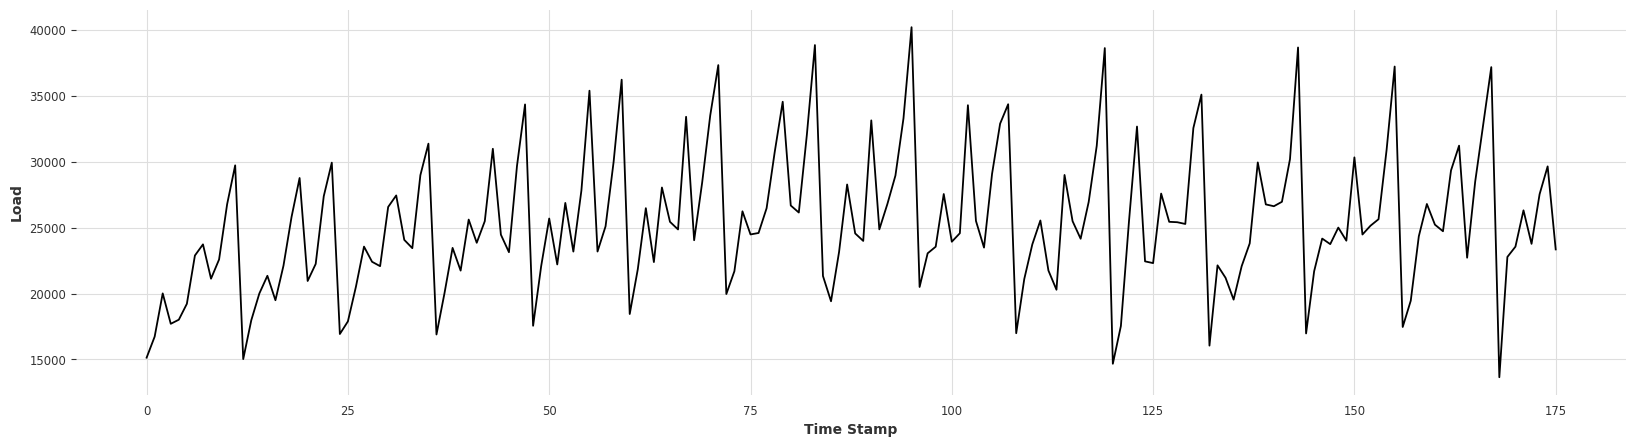

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(wineind)
plt.xlabel('Time Stamp')
plt.ylabel('Load')
plt.show()

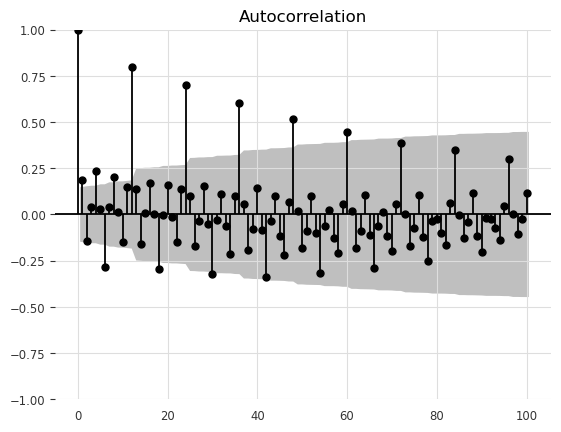

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

# Assume `time_series_data` is a pandas Series of your time series
plot_acf(wineind, lags=100)
plt.show()

In [6]:
cv = SlidingWindowForecastCV(step=1, h=1, window_size=24)
cv_generator = cv.split(wineind)

In [7]:
list(cv_generator)

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23]),
  array([24])),
 (array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24]),
  array([25])),
 (array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25]),
  array([26])),
 (array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
         20, 21, 22, 23, 24, 25, 26]),
  array([27])),
 (array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
         21, 22, 23, 24, 25, 26, 27]),
  array([28])),
 (array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24, 25, 26, 27, 28]),
  array([29])),
 (array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
         23, 24, 25, 26, 27, 28, 29]),
  array([30])),
 (array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,

In [8]:
import numpy as np
from sktime.split import SlidingWindowSplitter
ts = wineind


In [9]:
splitter = SlidingWindowSplitter(fh=np.arange(1,4), window_length=24, step_length=3)
list(splitter.split(ts))

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23]),
  array([24, 25, 26])),
 (array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
         20, 21, 22, 23, 24, 25, 26]),
  array([27, 28, 29])),
 (array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
         23, 24, 25, 26, 27, 28, 29]),
  array([30, 31, 32])),
 (array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
         26, 27, 28, 29, 30, 31, 32]),
  array([33, 34, 35])),
 (array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
         29, 30, 31, 32, 33, 34, 35]),
  array([36, 37, 38])),
 (array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38]),
  array([39, 40, 41])),
 (array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41]),
  array([42, 43, 44])),
 (array([21, 22, 23,

In [10]:
splitter.get_n_splits(ts)

50

In [11]:
result = list(splitter.split_series(ts))  # Convert the generator to a list
result[0][1] # Unpack the first two values if it has more elements

array([[16933.],
       [17892.],
       [20533.]])

In [12]:
from darts.utils.model_selection import train_test_split

In [36]:
dataset = train_test_split(ts, 
                           test_size=0.2,
                           axis=1,
                           input_size=50,
                           horizon=1,
                           vertical_split_type = 'model-aware', 
                           )

In [37]:
dataset

(array([15136., 16733., 20016., 17708., 18019., 19227., 22893., 23739.,
        21133., 22591., 26786., 29740., 15028., 17977., 20008., 21354.,
        19498., 22125., 25817., 28779., 20960., 22254., 27392., 29945.,
        16933., 17892., 20533., 23569., 22417., 22084., 26580., 27454.,
        24081., 23451., 28991., 31386., 16896., 20045., 23471., 21747.,
        25621., 23859., 25500., 30998., 24475., 23145., 29701., 34365.,
        17556., 22077., 25702., 22214., 26886., 23191., 27831., 35406.,
        23195., 25110., 30009., 36242., 18450., 21845., 26488., 22394.,
        28057., 25451., 24872., 33424., 24052., 28449., 33533., 37351.,
        19969., 21701., 26249., 24493., 24603., 26485., 30723., 34569.,
        26689., 26157., 32064., 38870., 21337., 19419., 23166., 28286.,
        24570., 24001., 33151., 24878., 26804., 28967., 33311., 40226.,
        20504., 23060., 23562., 27562., 23940., 24584., 34303., 25517.,
        23494., 29095., 32903., 34379., 16991., 21109., 23740., 

In [38]:
dataset[0].shape

(141,)